# Quickstart: running DYNAMITE

By the end of the notebook, you will have run a Schwarzschild model. This will involve the following steps:
1. run a small grid of orbit-based models with DYNAMITE
2. understand the structure of the output
2. plot the output

You should run this from the directory ``docs/tutorial_notebooks``.

## Setup

We will run DYNAMITE on CALIFA data of NGC 6278. To prepare the input data files, you should first run the tutorial "Data Preparation for Gauss Hermite kinematics" (``data_prep_for_gauss_hermites.ipynb``). The relevant files you need for this tutorial are:

```
| tutorial_notebooks
| ├── NGC6278_input     
| │   ├── dynamite_input                
| │   │   ├── gauss_hermite_kins.ecsv
| │   │   ├── aperture.dat
| │   │   ├── bins.dat 
| │   │   ├── mge.ecsv
| │   │   └── ...
| │   └── ...
| │   └── ...
| └── NGC6278_config.yaml
| └── *.ipynb
|
```

## Read the configuration file 

In [1]:
import dynamite as dyn

print('DYNAMITE')
print('    version', dyn.__version__)
print('    installed at ', dyn.__path__)

fname = 'NGC6278_config.yaml'
c = dyn.config_reader.Configuration(fname, reset_logging=True)

[INFO] 10:27:37 - dynamite.config_reader.Configuration - Config file NGC6278_config.yaml read.
[INFO] 10:27:37 - dynamite.config_reader.Configuration - io_settings...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - system_attributes...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - model_components...


DYNAMITE
    version 2.0.0
    installed at  ['/Users/maindl/.local/lib/python3.8/site-packages/dynamite-2.0.0-py3.8.egg/dynamite']


[INFO] 10:27:37 - dynamite.config_reader.Configuration - system_parameters...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - orblib_settings...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - weight_solver_settings...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - parameter_space_settings...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - multiprocessing_settings...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - ... using 4 CPUs.
[INFO] 10:27:37 - dynamite.config_reader.Configuration - legacy_settings...
[INFO] 10:27:37 - dynamite.config_reader.Configuration - System assembled
[INFO] 10:27:37 - dynamite.config_reader.Configuration - Configuration validated
[INFO] 10:27:37 - dynamite.config_reader.Configuration - Instantiated parameter space
[INFO] 10:27:37 - dynamite.model.AllModels - Previous models have been found: Reading NGC6278_output/all_models.ecsv into AllModels.table
[INFO] 10:27:37 - dynamite.config_reader.Configuration - Instan

All the options in the configuration file are held in the object `c`. For example, let's look at the `io_settings`. Output from this tutorial will be saved in the `output_directory`.

In [2]:
# delete previous output if available
c.remove_existing_orblibs()
c.remove_existing_all_models_file(wipe_other_files=False)
c.backup_config_file(keep=3, delete_other=True)

[INFO] 10:27:48 - dynamite.config_reader.Configuration - Model output tree NGC6278_output/models/ removed.
[INFO] 10:27:48 - dynamite.config_reader.Configuration - Deleted existing NGC6278_output/all_models.ecsv.
[INFO] 10:27:48 - dynamite.model.AllModels - No previous models (file NGC6278_output/all_models.ecsv) have been found: Making an empty table in AllModels.table
[INFO] 10:27:48 - dynamite.config_reader.Configuration - Instantiated empty AllModels object
[INFO] 10:27:48 - dynamite.config_reader.Configuration - Config file backup: NGC6278_output/NGC6278_config_005.yaml.


In [3]:
c.settings.io_settings

{'input_directory': 'NGC6278_input/dynamite_input/',
 'output_directory': 'NGC6278_output/',
 'all_models_file': 'all_models.ecsv',
 'model_directory': 'NGC6278_output/models/',
 'plot_directory': 'NGC6278_output/plots/'}

In fact, by creating the configuration object `c`, we have also created the `output_directory` and copied a version of the configuration file there,

In [4]:
ls NGC6278_output

NGC6278_config_002.yaml  NGC6278_config_004.yaml  plots/
NGC6278_config_003.yaml  NGC6278_config_005.yaml


## Run the models

Making the `ModelIterator` object will start running a grid of orbit-based models. This next step will take about 5-10 minutes using 4 cpus  

In [5]:
import time

t = time.perf_counter()

smi = dyn.model_iterator.ModelIterator(config=c)

delta_t = time.perf_counter()-t
print(f'Computation time: {delta_t} seconds = {delta_t/60} minutes')

[INFO] 10:27:59 - dynamite.model_iterator.ModelIterator - LegacyGridSearch: "iteration 0"
[INFO] 10:27:59 - dynamite.parameter_space.LegacyGridSearch - LegacyGridSearch added 1 new model(s) out of 1
[INFO] 10:27:59 - dynamite.model_iterator.ModelInnerIterator - ... running model 1 out of 1
[INFO] 10:27:59 - dynamite.orblib.LegacyOrbitLibrary - Calculating initial conditions
[INFO] 10:28:44 - dynamite.orblib.LegacyOrbitLibrary - Integrating orbit library tube orbits
[INFO] 10:28:52 - dynamite.orblib.LegacyOrbitLibrary - Integrating orbit library box orbits
[INFO] 10:29:02 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 10:29:02 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml5.00
[INFO] 10:29:06 - dynamite.plotter.Plotter - kinchi2 vs. model id plot created (1 models).
[INFO] 10:29:06 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/kinchi2_progress_plot.png saved in NGC6278_output/plots/
[I

[INFO] 10:32:54 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 10:32:54 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml5.00
[INFO] 10:32:54 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 10:32:54 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml5.00
[INFO] 10:32:58 - dynamite.model_iterator.ModelInnerIterator - ... running model 3 out of 4
[INFO] 10:32:58 - dynamite.model_iterator.ModelInnerIterator - ... running model 4 out of 4
[INFO] 10:33:02 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 10:33:02 - dynamite.weight_solvers.LegacyWeightSolver - Fitting orbit library to the kinematic data: ml4.00
[INFO] 10:33:02 - dynamite.weight_solvers.LegacyWeightSolver - Using WeightSolver: LegacyWeightSolver
[INFO] 10:33:02 - dynamite.weight_solvers.LegacyWeightSolver - 

Computation time: 310.486161506 seconds = 5.174769358433333 minutes


The following files have been created in the models directory,

In [6]:
ls NGC6278_output/models

orblib_000_000/ orblib_001_001/ orblib_002_001/ orblib_003_001/
orblib_001_000/ orblib_002_000/ orblib_003_000/


Each directory holds a different orbit library 

    orblib_XXX_YYY

where `XXX` labels the iteration when it was created, and `YYY` labels the position within that iteration. Looking inside one of these directories, we see the following files:

In [7]:
ls NGC6278_output/models/orblib_000_000

cmd_box_orbs   cmd_nnls_6.0   datfil/        ml3.00/        ml9.00/
cmd_nnls_1.0   cmd_nnls_7.0   fort.30        ml4.00/
cmd_nnls_3.0   cmd_nnls_9.0   infil/         ml5.00/
cmd_nnls_4.0   cmd_orb_start  interpolgrid   ml6.00/
cmd_nnls_5.0   cmd_tube_orbs  ml1.00/        ml7.00/


which are:

- `cmd_*`: bash scripts for running Fortran programs
- `datfil/`: directory holding the orbit library for the reference potential
- `infil/`: input files for running Fortran programs
- `ml*/`: directories containing output orbital weights (and other results) for different values of `ml`

Each `ml*` directory hold outputs for a re-scaled version of the same potential, where the value of `ml` is a mass scaling applied to a reference potential. The reference potential uses the the first value of `ml` encountered in the parameter search.

Some plots are automatically created,

In [8]:
ls NGC6278_output/plots

kinchi2_plot.png           kinematic_map_califa.png
kinchi2_progress_plot.png


and they represent the following quantities:

1. `kinchi2_progress_plot` : chi2 values vs model ID
<img src="NGC6278_output/plots/kinchi2_progress_plot.png" width="400">

2. `kinchi2_progress_plot` : model parameters vs chi2 values. If more than 2 paramters were left free, this would be a traingle plot of chi2 values,
<img src="NGC6278_output/plots/kinchi2_plot.png" width="400">

3. `kinematic_map_califa.png` : the kinematic maps for the current minimum-chi2 model
<img src="NGC6278_output/plots/kinematic_map_califa.png" width="800">

A summary of all the models run so far is saved in the file `NGC6278_output/all_models.ecsv`. This is an Astropy ECSV file. A table holding this data is stored in `c`, 

In [9]:
c.all_models.table

m-bh,a-bh,c-dh,f-dh,q-stars,p-stars,u-stars,ml,chi2,kinchi2,time_modified,orblib_done,weights_done,all_done,which_iter,directory
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,datetime64[ms],bool,bool,bool,int64,object
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,5.0,32879.18862513153,15733.575012462035,2021-07-17T07:29:06.000,True,True,True,0,orblib_000_000/ml5.00/
100000.0,0.001,8.0,3.1622776601683795,0.54,0.99,0.9999,5.0,34842.96511558838,17312.9139840719,2021-07-17T07:30:18.000,True,True,True,1,orblib_001_000/ml5.00/
100000.0,0.001,8.0,31.622776601683793,0.54,0.99,0.9999,5.0,45124.79469455472,16370.575738920932,2021-07-17T07:30:18.000,True,True,True,1,orblib_001_001/ml5.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,1.0,495984.69337550097,362523.9774877257,2021-07-17T07:30:26.000,True,True,True,1,orblib_000_000/ml1.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,9.0,53383.47579179637,35452.72211135065,2021-07-17T07:30:26.000,True,True,True,1,orblib_000_000/ml9.00/
100000.0,0.001,8.0,5.623413251903491,0.54,0.99,0.9999,5.0,33502.62991175184,16305.620206716418,2021-07-17T07:31:37.000,True,True,True,2,orblib_002_000/ml5.00/
100000.0,0.001,8.0,17.78279410038923,0.54,0.99,0.9999,5.0,45248.00444593534,16060.253424536433,2021-07-17T07:31:38.000,True,True,True,2,orblib_002_001/ml5.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,3.0,75741.13582092243,52489.74848878279,2021-07-17T07:31:45.000,True,True,True,2,orblib_000_000/ml3.00/
100000.0,0.001,8.0,10.0,0.54,0.99,0.9999,7.0,34617.91061672077,18153.2739794069,2021-07-17T07:31:45.000,True,True,True,2,orblib_000_000/ml7.00/


At this stage, you could:
    
- run more models, perhaps first adjusting settings in the configuration file,
    - increasing the `n_max_mods` and/or `n_max_iter`
    - adjust parameter bounds and/or which parameters are kept free
- plot other visualisations

## Plotting 

DYNAMITE provides other plotting methods in the `Plotter`:

In [10]:
plotter = dyn.plotter.Plotter(config=c)

In all the functions that require to use the values of the $\chi^2$ to make the plots, the user can choose which $\chi^2$ to use, by specifying the value of the parameter ``which_chi2``. The recommended value to use is ``which_chi2='kinchi2'``. 

The plots produced by the functions introduced below are all saved in the plot directory specified in the directory ``plots`` within the output directory specified in the configuration file. After running all the cells in this notebook, you will find your plots in the directory ``NGC6278_output/plots``.

The ``mass_plot`` function generates a cumulative mass plot, showing the enclosed mass profiles for the mass-follows-light component (red), for the dark matter (blue), and for the sum of the two (black). The solid lines correspond to the best-fit model, the shaded areas represent 1 sigma uncertainties. You can specify the radial extent of the plot and the type of file you want to be saved with the figure (e.g., ``'.png'``, ``'.pdf'``, ... if ``figtype=None``, the default is used and a ``'.png'`` figure is created).

Selecting  13  models


[INFO] 10:34:30 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/enclosedmassm_linear.png saved in NGC6278_output/plots/


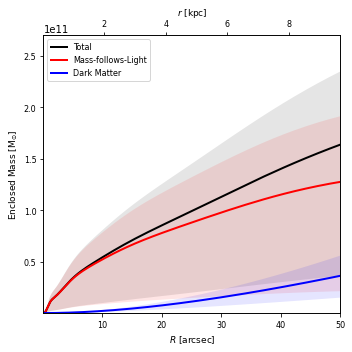

In [11]:
fig1 = plotter.mass_plot(which_chi2='kinchi2', Rmax_arcs=50, figtype=None)

The ``orbit_plot`` function generates a plot showing the stellar orbit distribution, described as probability density of orbits; circularity (lambda_z) is represented here as a function of the distance from the galactic centre r (in arcsec). You can specify the type of file you want to be saved with the figure (e.g., ``'.png'``, ``'.pdf'``, ...). In this case, ``Rmax_arcs`` represents the upper radial limit for orbit selection, in arcsec, meaning that only orbits extending up to ``Rmax_arcs`` are plotted.

[INFO] 10:34:41 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/orbit_linear_only.png saved in NGC6278_output/plots/


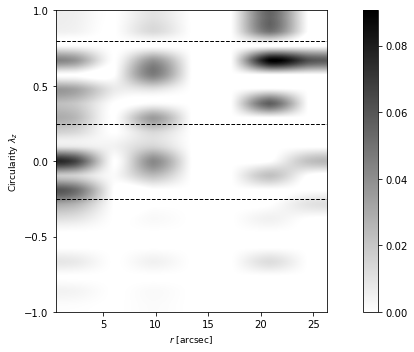

In [12]:
fig2 = plotter.orbit_plot(Rmax_arcs=50)

The ``beta_plot`` function generates two plots, showing the intrinsic and projected anisotropy profiles.

[INFO] 10:34:51 - dynamite.plotter.Plotter - Figure NGC6278_output/plots/anisotropy_var.png saved in NGC6278_output/plots/
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
[INFO] 10:34:51 - dynamite.plotter.Plotter - Figure NGC6278_output/plots/betaz_var.png saved in NGC6278_output/plots/


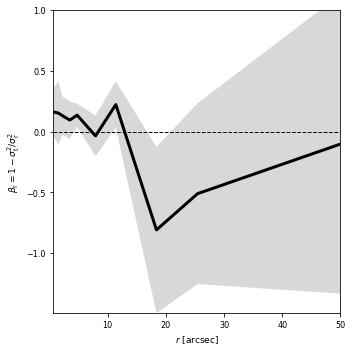

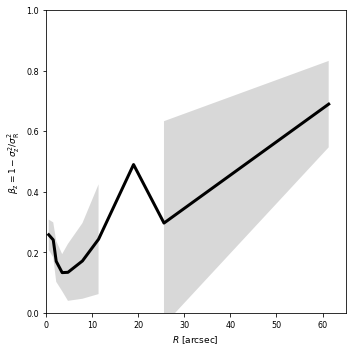

In [13]:
fig3, fig4 = plotter.beta_plot(which_chi2='kinchi2', Rmax_arcs=50)

The ``qpu_plot`` function creates a plot showing the intrinsic flattenings $q$ and $p$, with the blue and black lines respectively, as a function of the distance from the galactic centre (in arcsec). The value of $T = (1-p^2)/(1-q^2)$ is also shown (red line).

[INFO] 10:34:59 - dynamite.plotter.Plotter - Plot NGC6278_output/plots/triaxial_qpt.png saved in NGC6278_output/plots/


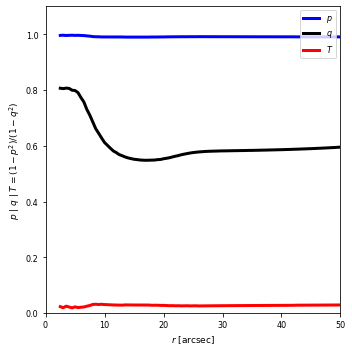

In [14]:
fig5 = plotter.qpu_plot(which_chi2='kinchi2', Rmax_arcs=50,figtype =None)